<a href="https://colab.research.google.com/github/farhadhsn8/Heart-Disease-Prediction-using-Machine-Learning/blob/master/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# random forest

In [1]:
from numpy import genfromtxt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
dataset = genfromtxt('heart.csv', delimiter=',')
dataset = dataset[1:]
dataset.shape

(303, 14)

In [2]:
# ---------K_FOLD CROSS VALIDATION --------------------
from sklearn.ensemble import RandomForestClassifier


def K_Fold(numberofTrees):
  X = dataset[:,0:-1]
  Y = dataset[:,-1]

  kf = KFold(n_splits=10 , random_state=None, shuffle=True) # ====> K = 10
  kf.get_n_splits(X)
  acc=[]


  for train_index, test_index in kf.split(X):
      clf = RandomForestClassifier(n_estimators=numberofTrees)
      clf = clf.fit(X[train_index], Y[train_index])
      y_pred = clf.predict( X[test_index])
      cm = confusion_matrix(Y[test_index], y_pred)
      true = np.diag(cm)
      accuricy = np.sum(true)/np.sum(cm)
      acc.append(accuricy)

  return sum(acc) / len(acc)


print('K_FOLD CROSS VALIDATION ACC IS : ',str( K_Fold(120) * 100 )+' % ' , '\n\n')







K_FOLD CROSS VALIDATION ACC IS :  83.20430107526882 %  




In [16]:
#---------------shuffle---------------------
from sklearn.utils import shuffle
dataset=shuffle(dataset)
dataset.shape

#-------------test & train ---------------
train=dataset[0:280,:]    
test=dataset[280:,:]  
test.shape                #(23, 14)
train.shape              # (280, 14)

(280, 14)

In [4]:
def computeAccuricy(y_true, y_pred , plot = 0):
  cm = confusion_matrix(y_true, y_pred)

  if plot : 
    df_cm = pd.DataFrame(cm,['not disease','disease'],['not disease','disease'])
    plt.figure(figsize = (10,8))
    sns.heatmap(df_cm, annot=True, cmap='Reds')


  true = np.diag(cm)
  accuricy = np.sum(true)/np.sum(cm)
  return accuricy

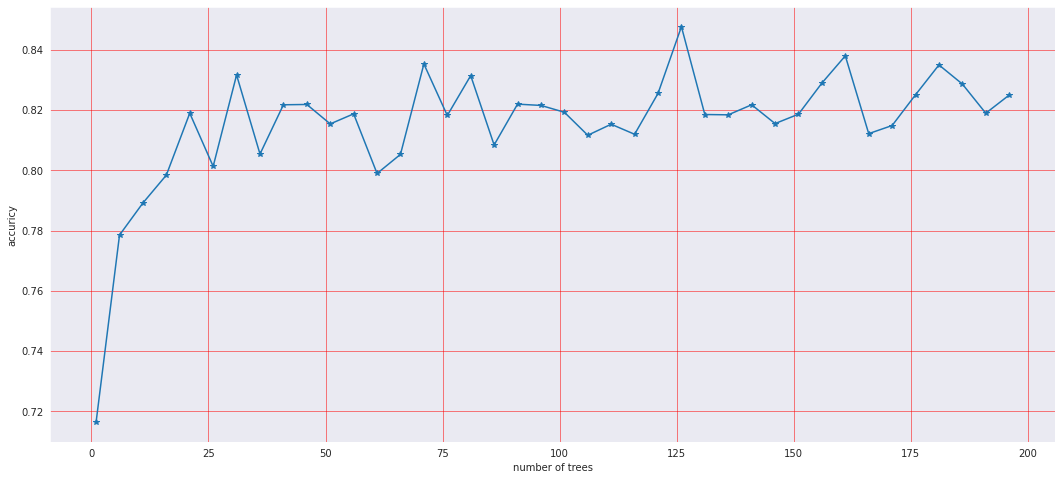

In [5]:
accs = []
for i in range(1,200,5):
  accs.append(K_Fold(i))
sns.set_style("darkgrid")
plt.figure(figsize = (18,8))
plt.plot(range(1,200,5), accs , marker = '*')
plt.xlabel("number of trees")
plt.ylabel("accuricy")
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

In [17]:
X = train[:,0:-1]
Y = train[:,-1]


100.0 %  




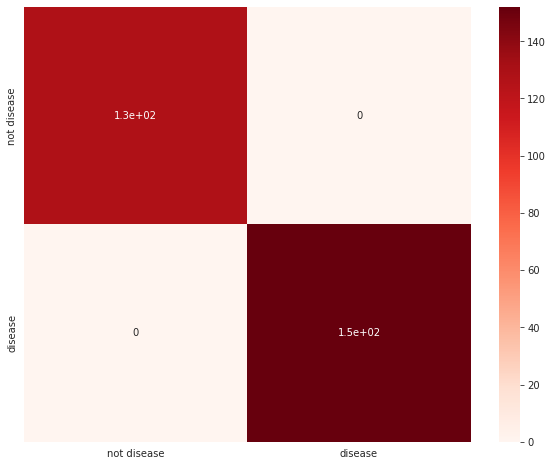

In [18]:
clf = RandomForestClassifier(n_estimators=190)
clf = clf.fit(X, Y)


y_pred_train = clf.predict(train[:, 0:-1])
y_true_train = train[:,-1]

acc = computeAccuricy(y_pred_train ,y_true_train ,1 )
print(str(acc * 100 )+' % ' , '\n\n')


86.95652173913044 %  




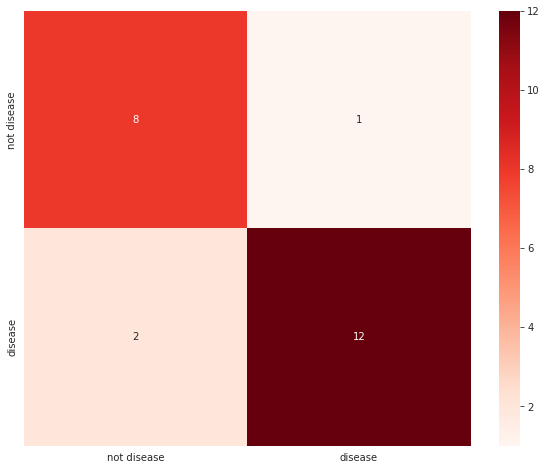

In [19]:
y_pred_test = clf.predict(test[:, 0:-1])
y_true_test = test[:,-1]

acc = computeAccuricy(y_pred_test ,y_true_test ,1 )
print(str(acc * 100 )+' % ' , '\n\n')